# Visualizacion de numero de columnas, filas y muestra de datos 

In [3]:
import pandas as pd

df_data = pd.read_csv('./SI_DATA_POBREZA.csv')

# manejo de valores nulos

df_clean = df_data.dropna()

# numero de filas y columnas

row,col = df_clean.shape;
print('Numero de columnas: ',col,' Numero de filas: ',row)

#impresion de las primeras 11 filas

df_data.head(11)

Numero de columnas:  15  Numero de filas:  286


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS
0,2012,AMAZONAS,"436,165","63,148","130,853","242,164",0.445,0.145,666,0.00153,8.3,0.755,774,1.147,0.500
1,2013,AMAZONAS,"437,480","69,125","137,863","230,492",0.473,0.158,844,0.00193,8.3,0.755,756,1.008,0.547
2,2014,AMAZONAS,"441,984","62,491","164,295","215,198",0.513,0.141,856,0.00194,8.4,0.764,745,0.993,0.513
3,2015,AMAZONAS,"443,783","46,598","141,065","256,120",0.423,0.105,945,0.00213,8.5,0.773,818,1.091,0.530
4,2016,AMAZONAS,"442,069","50,679","124,866","266,524",0.397,0.115,949,0.00215,8.5,0.773,845,0.994,0.559
5,2017,AMAZONAS,"438,629","41,637","111,358","285,634",0.349,0.095,1200,0.00274,8.7,0.791,857,1.008,0.600
6,2018,AMAZONAS,"437,752","27,083","119,620","291,049",0.335,0.062,1397,0.00319,8.8,0.800,881,0.927,0.577
7,2019,AMAZONAS,"439,625","17,251","116,784","305,590",0.305,0.039,1810,0.00412,9.0,0.818,895,0.942,0.589
8,2020,AMAZONAS,"433,062","33,491","122,925","276,646",0.361,0.077,1454,0.00336,8.9,0.809,834,0.878,0.653
9,2021,AMAZONAS,"434,505","39,157","91,613","303,735",0.301,0.090,1720,0.00396,9.1,0.827,955,1.005,0.656


Comprobamos que los datos estan integros y que el numero de columnas y filas corresponden con los que estan en nuestra bd.

# Función de carga de data y estandarización de la data

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def load_data(file_path):
    # Cargar el dataset
    df = pd.read_csv(file_path)
    row, col = df.shape
    print(f'Tenemos {row} filas y {col} columnas')

    # Lista de columnas para el clustering
    variables_clustering = [
        'PORCENTAJE_POBREZA', 'RATIO_VIOLENCIA', 
        'RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO', 
        'RATIO_DE_INGRESO_PER_CAPITA', 
        'PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS'
    ]

    # Verificar que las columnas existan en el DataFrame
    for column in variables_clustering:
        if column not in df.columns:
            raise ValueError(f"La columna {column} no existe en el DataFrame")

    # Manejo de valores faltantes
    imputer = SimpleImputer(strategy='mean')
    df[variables_clustering] = imputer.fit_transform(df[variables_clustering])

    # Escalado de datos
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[variables_clustering]), columns=variables_clustering)

    return df_scaled, df

if __name__ == "__main__":
    print("1. Cargando dataset\n")
    data_scaled, df_original = load_data('./SI_DATA_POBREZA.csv')
    
    print("\nDatos originales (primeras 10 filas):\n")
    print(df_original.head(10))

    print("\n2. Dataset escalado (primeras 10 filas):\n")
    print(data_scaled.head(10))

1. Cargando dataset

Tenemos 286 filas y 15 columnas

Datos originales (primeras 10 filas):

    AÑO DEPARTAMENTO POBLACION TOTAL POBLACION POBRE EXTREMO   \
0  2012     AMAZONAS         436,165                   63,148   
1  2013     AMAZONAS         437,480                   69,125   
2  2014     AMAZONAS         441,984                   62,491   
3  2015     AMAZONAS         443,783                   46,598   
4  2016     AMAZONAS         442,069                   50,679   
5  2017     AMAZONAS         438,629                   41,637   
6  2018     AMAZONAS         437,752                   27,083   
7  2019     AMAZONAS         439,625                   17,251   
8  2020     AMAZONAS         433,062                   33,491   
9  2021     AMAZONAS         434,505                   39,157   

  POBLACION POBRE NO EXTREMO POBLACION NO POBRE  PORCENTAJE_POBREZA  \
0                    130,853            242,164               0.445   
1                    137,863            230,492  

# FUNCION DONDE SE DETERMINA DOS PCA PARA LA REDUCCION DE DIMENSIONES PARA LA POSTERIOR CLUSTERIZACION

In [22]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

def load_data(file_path):
    # Cargar el dataset
    df = pd.read_csv(file_path)
    row, col = df.shape
    print(f'Tenemos {row} filas y {col} columnas')

    # Lista de columnas para el clustering
    variables_clustering = [
        'PORCENTAJE_POBREZA', 'RATIO_VIOLENCIA', 
        'RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO', 
        'RATIO_DE_INGRESO_PER_CAPITA', 
        'PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS'
    ]

    # Verificar que las columnas existan en el DataFrame
    for column in variables_clustering:
        if column not in df.columns:
            raise ValueError(f"La columna {column} no existe en el DataFrame")

    # Manejo de valores faltantes
    imputer = SimpleImputer(strategy='mean')
    df[variables_clustering] = imputer.fit_transform(df[variables_clustering])

    # Escalado de datos
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[variables_clustering]), columns=variables_clustering)

    return df_scaled, df

def pca_embeddings(df_scaled):
    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(df_scaled)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)

    print("\n*************** Most important features *************************")
    print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.4].iloc[0]).dropna())
    print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.4].iloc[1]).dropna())
    print("\n******************************************************************")

    return pca_2_result, pca_2

if __name__ == "__main__":
    print("1. Cargando dataset\n")
    data_scaled, df_original = load_data('./SI_DATA_POBREZA.csv')
    
    print("\nDatos originales (primeras 10 filas):\n")
    print(df_original.head(10))

    print("\n2. Dataset escalado (primeras 10 filas):\n")
    print(data_scaled.head(10))

    print("\n\n3. Reducción de dimensionalidad con PCA\n")
    pca_result, pca_2 = pca_embeddings(data_scaled)


1. Cargando dataset

Tenemos 286 filas y 15 columnas

Datos originales (primeras 10 filas):

    AÑO DEPARTAMENTO POBLACION TOTAL POBLACION POBRE EXTREMO   \
0  2012     AMAZONAS         436,165                   63,148   
1  2013     AMAZONAS         437,480                   69,125   
2  2014     AMAZONAS         441,984                   62,491   
3  2015     AMAZONAS         443,783                   46,598   
4  2016     AMAZONAS         442,069                   50,679   
5  2017     AMAZONAS         438,629                   41,637   
6  2018     AMAZONAS         437,752                   27,083   
7  2019     AMAZONAS         439,625                   17,251   
8  2020     AMAZONAS         433,062                   33,491   
9  2021     AMAZONAS         434,505                   39,157   

  POBLACION POBRE NO EXTREMO POBLACION NO POBRE  PORCENTAJE_POBREZA  \
0                    130,853            242,164               0.445   
1                    137,863            230,492  

# Funcion de analisis de la metrica Silhouette para determinar el numero de clusters ideal

1. Cargando dataset

Tenemos 286 filas y 15 columnas

Datos originales (primeras 10 filas):

    AÑO DEPARTAMENTO POBLACION TOTAL POBLACION POBRE EXTREMO   \
0  2012     AMAZONAS         436,165                   63,148   
1  2013     AMAZONAS         437,480                   69,125   
2  2014     AMAZONAS         441,984                   62,491   
3  2015     AMAZONAS         443,783                   46,598   
4  2016     AMAZONAS         442,069                   50,679   
5  2017     AMAZONAS         438,629                   41,637   
6  2018     AMAZONAS         437,752                   27,083   
7  2019     AMAZONAS         439,625                   17,251   
8  2020     AMAZONAS         433,062                   33,491   
9  2021     AMAZONAS         434,505                   39,157   

  POBLACION POBRE NO EXTREMO POBLACION NO POBRE  PORCENTAJE_POBREZA  \
0                    130,853            242,164               0.445   
1                    137,863            230,492  

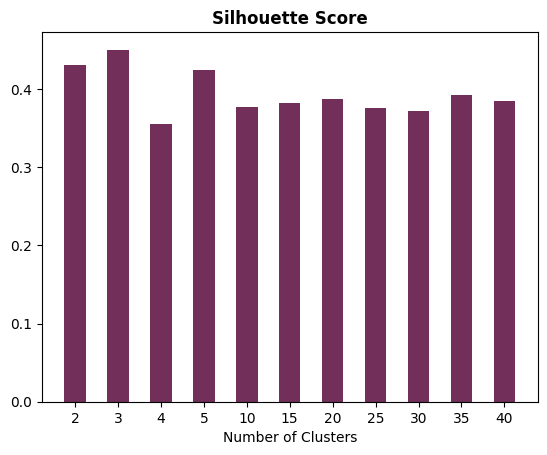

Número óptimo de clusters = 3

Número de datos en cada cluster:
Cluster 0: 61 datos
Cluster 1: 102 datos
Cluster 2: 123 datos

Muestras de datos en cada cluster:

Cluster 0:


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS,CLUSTER
17,2018,ÁNCASH,"1,180,492","40,018","199,792","940,682",0.203,0.034,5791,0.00491,9.7,0.882,1022,1.076,0.707,0
18,2019,ÁNCASH,"1,177,031","33,472","172,999","970,560",0.175,0.028,9177,0.00780,9.8,0.891,1123,1.182,0.729,0
19,2020,ÁNCASH,"1,180,666","49,202","302,966","828,498",0.298,0.042,5119,0.00434,9.7,0.882,884,0.931,0.744,0
20,2021,ÁNCASH,"1,173,737","37,070","219,527","917,140",0.219,0.032,8310,0.00708,9.8,0.891,1044,1.099,0.741,0
21,2022,ÁNCASH,"1,190,320","48,217","207,298","934,805",0.215,0.041,7257,0.00610,9.9,0.900,1085,1.059,0.758,0
29,2019,APURÍMAC,"479,130","24,354","115,007","339,769",0.291,0.051,3981,0.00831,9.7,0.882,885,0.932,0.601,0
30,2020,APURÍMAC,"484,961","39,793","132,212","312,956",0.355,0.082,2841,0.00586,9.7,0.882,785,0.826,0.718,0
31,2021,APURÍMAC,"478,341","29,824","105,536","342,981",0.283,0.062,3823,0.00799,9.6,0.873,926,0.975,0.683,0
32,2022,APURÍMAC,"481,709","15,807","102,972","362,930",0.247,0.033,2935,0.00609,9.7,0.882,1030,1.005,0.723,0
38,2017,AREQUIPA,"1,322,590","10,094","96,509","1,215,987",0.081,0.008,9532,0.00721,10.9,0.991,1429,1.681,0.795,0



Cluster 1:


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS,CLUSTER
11,2012,ÁNCASH,"1,160,615","62,624","255,771","842,220",0.274,0.054,1562,0.00135,9.7,0.882,1017,1.507,0.649,1
12,2013,ÁNCASH,"1,154,768","44,224","227,203","883,341",0.235,0.038,1992,0.00173,9.5,0.864,1060,1.413,0.690,1
13,2014,ÁNCASH,"1,164,507","61,834","216,978","885,695",0.239,0.053,2363,0.00203,9.5,0.864,1070,1.427,0.714,1
14,2015,ÁNCASH,"1,176,162","42,259","240,556","893,347",0.240,0.036,3296,0.00280,9.4,0.855,1003,1.337,0.681,1
15,2016,ÁNCASH,"1,175,975","51,792","203,146","921,037",0.217,0.044,3741,0.00318,9.6,0.873,1039,1.222,0.708,1
16,2017,ÁNCASH,"1,176,935","47,885","215,237","913,813",0.224,0.041,3883,0.00330,9.5,0.864,989,1.164,0.714,1
33,2012,AREQUIPA,"1,264,617","17,210","133,313","1,114,094",0.119,0.014,1623,0.00128,10.7,0.973,1438,2.130,0.754,1
34,2013,AREQUIPA,"1,280,771","17,713","98,223","1,164,835",0.091,0.014,1858,0.00145,10.8,0.982,1466,1.955,0.728,1
35,2014,AREQUIPA,"1,291,345","14,330","86,037","1,190,978",0.078,0.011,2371,0.00184,10.7,0.973,1471,1.961,0.725,1
36,2015,AREQUIPA,"1,295,858","10,384","96,356","1,189,118",0.082,0.008,2547,0.00197,10.9,0.991,1430,1.907,0.744,1



Cluster 2:


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS,CLUSTER
0,2012,AMAZONAS,"436,165","63,148","130,853","242,164",0.445,0.145,666,0.00153,8.3,0.755,774,1.147,0.500,2
1,2013,AMAZONAS,"437,480","69,125","137,863","230,492",0.473,0.158,844,0.00193,8.3,0.755,756,1.008,0.547,2
2,2014,AMAZONAS,"441,984","62,491","164,295","215,198",0.513,0.141,856,0.00194,8.4,0.764,745,0.993,0.513,2
3,2015,AMAZONAS,"443,783","46,598","141,065","256,120",0.423,0.105,945,0.00213,8.5,0.773,818,1.091,0.530,2
4,2016,AMAZONAS,"442,069","50,679","124,866","266,524",0.397,0.115,949,0.00215,8.5,0.773,845,0.994,0.559,2
5,2017,AMAZONAS,"438,629","41,637","111,358","285,634",0.349,0.095,1200,0.00274,8.7,0.791,857,1.008,0.600,2
6,2018,AMAZONAS,"437,752","27,083","119,620","291,049",0.335,0.062,1397,0.00319,8.8,0.800,881,0.927,0.577,2
7,2019,AMAZONAS,"439,625","17,251","116,784","305,590",0.305,0.039,1810,0.00412,9.0,0.818,895,0.942,0.589,2
8,2020,AMAZONAS,"433,062","33,491","122,925","276,646",0.361,0.077,1454,0.00336,8.9,0.809,834,0.878,0.653,2
9,2021,AMAZONAS,"434,505","39,157","91,613","303,735",0.301,0.090,1720,0.00396,9.1,0.827,955,1.005,0.656,2


In [27]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


def load_data(file_path):
    # Cargar el dataset
    df = pd.read_csv(file_path)
    row, col = df.shape
    print(f'Tenemos {row} filas y {col} columnas')

    # Lista de columnas para el clustering
    variables_clustering = [
        'PORCENTAJE_POBREZA', 'RATIO_VIOLENCIA', 
        'RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO', 
        'RATIO_DE_INGRESO_PER_CAPITA', 
        'PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS'
    ]

    # Verificar que las columnas existan en el DataFrame
    for column in variables_clustering:
        if column not in df.columns:
            raise ValueError(f"La columna {column} no existe en el DataFrame")

    # Manejo de valores faltantes
    imputer = SimpleImputer(strategy='mean')
    df[variables_clustering] = imputer.fit_transform(df[variables_clustering])

    # Escalado de datos
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[variables_clustering]), columns=variables_clustering)

    return df_scaled, df

def pca_embeddings(df_scaled):
    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(df_scaled)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)

    print("\n*************** Most important features *************************")
    print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.4].iloc[0]).dropna())
    print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.4].iloc[1]).dropna())
    print("\n******************************************************************")

    return pca_2_result, pca_2

def kmean_hyper_param_tuning(data):
    parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()
    silhouette_scores = []

    for p in parameter_grid:
        kmeans_model.set_params(**p)
        kmeans_model.fit(data)
        ss = metrics.silhouette_score(data, kmeans_model.labels_)
        silhouette_scores.append(ss)

        print('Parameter:', p, 'Score', ss)

        if ss > best_score:
            best_score = ss
            best_grid = p

    plt.bar(range(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), parameters)
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']

if __name__ == "__main__":
    print("1. Cargando dataset\n")
    data_scaled, df_original = load_data('./SI_DATA_POBREZA.csv')
    
    print("\nDatos originales (primeras 10 filas):\n")
    print(df_original[:10].head(10))

    print("\n2. Dataset escalado (primeras 10 filas):\n")
    print(data_scaled[:10].head(10))

    print("\n\n3. Reducción de dimensionalidad con PCA\n")
    pca_result, pca_2 = pca_embeddings(data_scaled)

    print("\n\n 4. Selección de hiperparámetros para KMeans\n")
    optimum_num_clusters = kmean_hyper_param_tuning(pca_result)
    print("Número óptimo de clusters =", optimum_num_clusters)

    kmeans = KMeans(n_clusters=optimum_num_clusters, init='random')
    kmeans.fit(data_scaled)
    centroids = kmeans.cluster_centers_
    centroids_pca = pca_2.transform(centroids)

    df_original['CLUSTER'] = kmeans.labels_
    cluster_labels = kmeans.labels_
    unique, counts = np.unique(cluster_labels, return_counts=True)
    cluster_counts = dict(zip(unique, counts))
    print("\nNúmero de datos en cada cluster:")
    for cluster, count in cluster_counts.items():
        print(f"Cluster {cluster}: {count} datos")

    print("\nMuestras de datos en cada cluster:")
    for cluster in unique:
        sample_data = df_original[df_original['CLUSTER'] == cluster].head(10)
        print(f"\nCluster {cluster}:")
        display(sample_data)  # Usar display para mostrar el DataFrame en formato tabla


# Selección de número óptimo de clusters e implementación del k-means

1. Cargando dataset

Tenemos 286 filas y 15 columnas

Datos originales (primeras 10 filas):

    AÑO DEPARTAMENTO POBLACION TOTAL POBLACION POBRE EXTREMO   \
0  2012     AMAZONAS         436,165                   63,148   
1  2013     AMAZONAS         437,480                   69,125   
2  2014     AMAZONAS         441,984                   62,491   
3  2015     AMAZONAS         443,783                   46,598   
4  2016     AMAZONAS         442,069                   50,679   
5  2017     AMAZONAS         438,629                   41,637   
6  2018     AMAZONAS         437,752                   27,083   
7  2019     AMAZONAS         439,625                   17,251   
8  2020     AMAZONAS         433,062                   33,491   
9  2021     AMAZONAS         434,505                   39,157   

  POBLACION POBRE NO EXTREMO POBLACION NO POBRE  PORCENTAJE_POBREZA  \
0                    130,853            242,164               0.445   
1                    137,863            230,492  

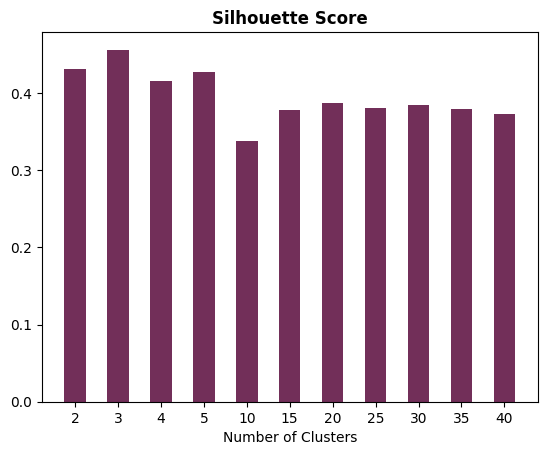

Número óptimo de clusters = 3

Número de datos en cada cluster:
Cluster 0: 102 datos
Cluster 1: 123 datos
Cluster 2: 61 datos

Muestras de datos en cada cluster:

Cluster 0:


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS,CLUSTER
11,2012,ÁNCASH,"1,160,615","62,624","255,771","842,220",0.274,0.054,1562,0.00135,9.7,0.882,1017,1.507,0.649,0
12,2013,ÁNCASH,"1,154,768","44,224","227,203","883,341",0.235,0.038,1992,0.00173,9.5,0.864,1060,1.413,0.690,0
13,2014,ÁNCASH,"1,164,507","61,834","216,978","885,695",0.239,0.053,2363,0.00203,9.5,0.864,1070,1.427,0.714,0
14,2015,ÁNCASH,"1,176,162","42,259","240,556","893,347",0.240,0.036,3296,0.00280,9.4,0.855,1003,1.337,0.681,0
15,2016,ÁNCASH,"1,175,975","51,792","203,146","921,037",0.217,0.044,3741,0.00318,9.6,0.873,1039,1.222,0.708,0
16,2017,ÁNCASH,"1,176,935","47,885","215,237","913,813",0.224,0.041,3883,0.00330,9.5,0.864,989,1.164,0.714,0
33,2012,AREQUIPA,"1,264,617","17,210","133,313","1,114,094",0.119,0.014,1623,0.00128,10.7,0.973,1438,2.130,0.754,0
34,2013,AREQUIPA,"1,280,771","17,713","98,223","1,164,835",0.091,0.014,1858,0.00145,10.8,0.982,1466,1.955,0.728,0
35,2014,AREQUIPA,"1,291,345","14,330","86,037","1,190,978",0.078,0.011,2371,0.00184,10.7,0.973,1471,1.961,0.725,0
36,2015,AREQUIPA,"1,295,858","10,384","96,356","1,189,118",0.082,0.008,2547,0.00197,10.9,0.991,1430,1.907,0.744,0



Cluster 1:


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS,CLUSTER
0,2012,AMAZONAS,"436,165","63,148","130,853","242,164",0.445,0.145,666,0.00153,8.3,0.755,774,1.147,0.500,1
1,2013,AMAZONAS,"437,480","69,125","137,863","230,492",0.473,0.158,844,0.00193,8.3,0.755,756,1.008,0.547,1
2,2014,AMAZONAS,"441,984","62,491","164,295","215,198",0.513,0.141,856,0.00194,8.4,0.764,745,0.993,0.513,1
3,2015,AMAZONAS,"443,783","46,598","141,065","256,120",0.423,0.105,945,0.00213,8.5,0.773,818,1.091,0.530,1
4,2016,AMAZONAS,"442,069","50,679","124,866","266,524",0.397,0.115,949,0.00215,8.5,0.773,845,0.994,0.559,1
5,2017,AMAZONAS,"438,629","41,637","111,358","285,634",0.349,0.095,1200,0.00274,8.7,0.791,857,1.008,0.600,1
6,2018,AMAZONAS,"437,752","27,083","119,620","291,049",0.335,0.062,1397,0.00319,8.8,0.800,881,0.927,0.577,1
7,2019,AMAZONAS,"439,625","17,251","116,784","305,590",0.305,0.039,1810,0.00412,9.0,0.818,895,0.942,0.589,1
8,2020,AMAZONAS,"433,062","33,491","122,925","276,646",0.361,0.077,1454,0.00336,8.9,0.809,834,0.878,0.653,1
9,2021,AMAZONAS,"434,505","39,157","91,613","303,735",0.301,0.090,1720,0.00396,9.1,0.827,955,1.005,0.656,1



Cluster 2:


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS,CLUSTER
17,2018,ÁNCASH,"1,180,492","40,018","199,792","940,682",0.203,0.034,5791,0.00491,9.7,0.882,1022,1.076,0.707,2
18,2019,ÁNCASH,"1,177,031","33,472","172,999","970,560",0.175,0.028,9177,0.00780,9.8,0.891,1123,1.182,0.729,2
19,2020,ÁNCASH,"1,180,666","49,202","302,966","828,498",0.298,0.042,5119,0.00434,9.7,0.882,884,0.931,0.744,2
20,2021,ÁNCASH,"1,173,737","37,070","219,527","917,140",0.219,0.032,8310,0.00708,9.8,0.891,1044,1.099,0.741,2
21,2022,ÁNCASH,"1,190,320","48,217","207,298","934,805",0.215,0.041,7257,0.00610,9.9,0.900,1085,1.059,0.758,2
29,2019,APURÍMAC,"479,130","24,354","115,007","339,769",0.291,0.051,3981,0.00831,9.7,0.882,885,0.932,0.601,2
30,2020,APURÍMAC,"484,961","39,793","132,212","312,956",0.355,0.082,2841,0.00586,9.7,0.882,785,0.826,0.718,2
31,2021,APURÍMAC,"478,341","29,824","105,536","342,981",0.283,0.062,3823,0.00799,9.6,0.873,926,0.975,0.683,2
32,2022,APURÍMAC,"481,709","15,807","102,972","362,930",0.247,0.033,2935,0.00609,9.7,0.882,1030,1.005,0.723,2
38,2017,AREQUIPA,"1,322,590","10,094","96,509","1,215,987",0.081,0.008,9532,0.00721,10.9,0.991,1429,1.681,0.795,2




5. Visualizando los clusters


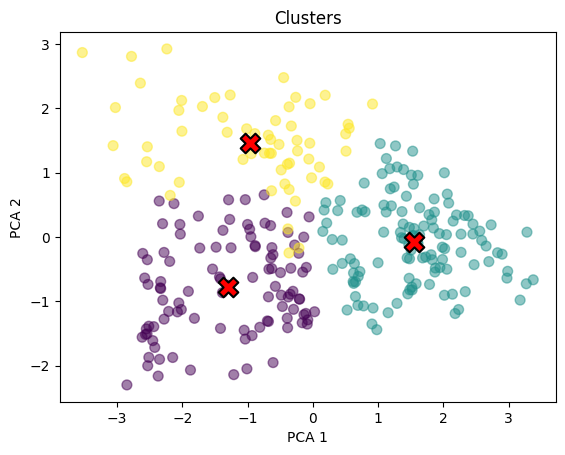

In [2]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


def load_data(file_path):
    # Cargar el dataset
    df = pd.read_csv(file_path)
    row, col = df.shape
    print(f'Tenemos {row} filas y {col} columnas')

    # Lista de columnas para el clustering
    variables_clustering = [
        'PORCENTAJE_POBREZA', 'RATIO_VIOLENCIA', 
        'RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO', 
        'RATIO_DE_INGRESO_PER_CAPITA', 
        'PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS'
    ]

    # Verificar que las columnas existan en el DataFrame
    for column in variables_clustering:
        if column not in df.columns:
            raise ValueError(f"La columna {column} no existe en el DataFrame")

    # Manejo de valores faltantes
    imputer = SimpleImputer(strategy='mean')
    df[variables_clustering] = imputer.fit_transform(df[variables_clustering])

    # Escalado de datos
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[variables_clustering]), columns=variables_clustering)

    return df_scaled, df

def pca_embeddings(df_scaled):
    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(df_scaled)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)

    print("\n*************** Most important features *************************")
    print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.4].iloc[0]).dropna())
    print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.4].iloc[1]).dropna())
    print("\n******************************************************************")

    return pca_2_result, pca_2

def kmean_hyper_param_tuning(data):
    parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()
    silhouette_scores = []

    for p in parameter_grid:
        kmeans_model.set_params(**p)
        kmeans_model.fit(data)
        ss = metrics.silhouette_score(data, kmeans_model.labels_)
        silhouette_scores.append(ss)

        print('Parameter:', p, 'Score', ss)

        if ss > best_score:
            best_score = ss
            best_grid = p

    plt.bar(range(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), parameters)
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']


def visualizing_results(pca_result, labels, centroids_pca):
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=labels, alpha=0.5, s=50)
    plt.title('Clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5, color='red', edgecolors="black")
    plt.show()

if __name__ == "__main__":
    print("1. Cargando dataset\n")
    data_scaled, df_original = load_data('./SI_DATA_POBREZA.csv')
    
    print("\nDatos originales (primeras 10 filas):\n")
    print(df_original[:10].head(10))

    print("\n2. Dataset escalado (primeras 10 filas):\n")
    print(data_scaled[:10].head(10))

    print("\n\n3. Reducción de dimensionalidad con PCA\n")
    pca_result, pca_2 = pca_embeddings(data_scaled)

    print("\n\n 4. Selección de hiperparámetros para KMeans\n")
    optimum_num_clusters = kmean_hyper_param_tuning(pca_result)
    print("Número óptimo de clusters =", optimum_num_clusters)

    kmeans = KMeans(n_clusters=optimum_num_clusters, init='random')
    kmeans.fit(data_scaled)
    centroids = kmeans.cluster_centers_
    centroids_pca = pca_2.transform(centroids)

    df_original['CLUSTER'] = kmeans.labels_
    cluster_labels = kmeans.labels_
    unique, counts = np.unique(cluster_labels, return_counts=True)
    cluster_counts = dict(zip(unique, counts))
    print("\nNúmero de datos en cada cluster:")
    for cluster, count in cluster_counts.items():
        print(f"Cluster {cluster}: {count} datos")

    print("\nMuestras de datos en cada cluster:")
    for cluster in unique:
        sample_data = df_original[df_original['CLUSTER'] == cluster].head(10)
        print(f"\nCluster {cluster}:")
        display(sample_data)  # Usar display para mostrar el DataFrame en formato tabla

    print("\n\n5. Visualizando los clusters")
    
    visualizing_results(pca_result, kmeans.labels_, centroids_pca)

    data_scaled["CLUSTER"] = kmeans.labels_

# Algoritmo de coordenadas paralelas para todos los datos, datos representativos (10 de cada cluster) y los centroides

1. Cargando dataset

Tenemos 286 filas y 15 columnas

Datos originales (primeras 10 filas):



,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS
0,2012,AMAZONAS,"436,165","63,148","130,853","242,164",0.445,0.145,666,0.00153,8.3,0.755,774,1.147,0.500
1,2013,AMAZONAS,"437,480","69,125","137,863","230,492",0.473,0.158,844,0.00193,8.3,0.755,756,1.008,0.547
2,2014,AMAZONAS,"441,984","62,491","164,295","215,198",0.513,0.141,856,0.00194,8.4,0.764,745,0.993,0.513
3,2015,AMAZONAS,"443,783","46,598","141,065","256,120",0.423,0.105,945,0.00213,8.5,0.773,818,1.091,0.530
4,2016,AMAZONAS,"442,069","50,679","124,866","266,524",0.397,0.115,949,0.00215,8.5,0.773,845,0.994,0.559
5,2017,AMAZONAS,"438,629","41,637","111,358","285,634",0.349,0.095,1200,0.00274,8.7,0.791,857,1.008,0.600
6,2018,AMAZONAS,"437,752","27,083","119,620","291,049",0.335,0.062,1397,0.00319,8.8,0.800,881,0.927,0.577
7,2019,AMAZONAS,"439,625","17,251","116,784","305,590",0.305,0.039,1810,0.00412,9.0,0.818,895,0.942,0.589
8,2020,AMAZONAS,"433,062","33,491","122,925","276,646",0.361,0.077,1454,0.00336,8.9,0.809,834,0.878,0.653
9,2021,AMAZONAS,"434,505","39,157","91,613","303,735",0.301,0.090,1720,0.00396,9.1,0.827,955,1.005,0.656



2. Dataset escalado (primeras 10 filas):



,PORCENTAJE_POBREZA,RATIO_VIOLENCIA,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS
0,1.500523,-0.914153,-1.841217,-0.192425,-0.761273
1,1.718219,-0.733070,-1.841217,-0.586433,-0.468775
2,2.029214,-0.728543,-1.714840,-0.628952,-0.680369
3,1.329475,-0.642528,-1.588462,-0.351162,-0.574572
4,1.127329,-0.633474,-1.588462,-0.626117,-0.394095
5,0.754135,-0.366377,-1.335706,-0.586433,-0.138937
6,0.645287,-0.162658,-1.209328,-0.816035,-0.282074
7,0.412041,0.258360,-0.956573,-0.773516,-0.207394
8,0.847434,-0.085698,-1.082951,-0.954930,0.190900
9,0.380941,0.185927,-0.830195,-0.594937,0.209570




3. Reducción de dimensionalidad con PCA

Explained variation per principal component: [0.51806667 0.22721251]
Cumulative variance explained by 2 principal components: 74.53%


       PORCENTAJE_POBREZA  RATIO_VIOLENCIA  RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO  \
PC_1            0.553538         0.204275                           0.479561   
PC_2            0.115629         0.828235                           0.137794   

      RATIO_DE_INGRESO_PER_CAPITA  PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS  
PC_1                     0.466717                                  0.451734  
PC_2                     0.509794                                  0.147578  

*************** Most important features *************************
As per PC 1:
 PORCENTAJE_POBREZA                          0.553538
RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO           0.479561
RATIO_DE_INGRESO_PER_CAPITA                 0.466717
PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS    0.451734
Name: PC_1, dtype: float64


As per PC 2:
 RATIO_VIOL

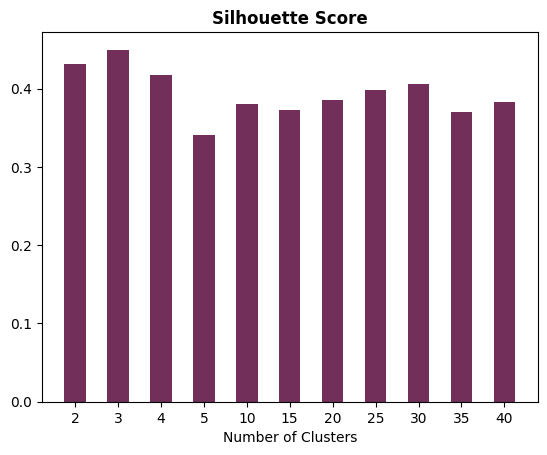

Número óptimo de clusters = 3

Número de datos en cada cluster:
Cluster 0: 102 datos
Cluster 1: 61 datos
Cluster 2: 123 datos

Muestras de datos en cada cluster:

Cluster 0:


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS,CLUSTER
11,2012,ÁNCASH,"1,160,615","62,624","255,771","842,220",0.274,0.054,1562,0.00135,9.7,0.882,1017,1.507,0.649,0
12,2013,ÁNCASH,"1,154,768","44,224","227,203","883,341",0.235,0.038,1992,0.00173,9.5,0.864,1060,1.413,0.690,0
13,2014,ÁNCASH,"1,164,507","61,834","216,978","885,695",0.239,0.053,2363,0.00203,9.5,0.864,1070,1.427,0.714,0
14,2015,ÁNCASH,"1,176,162","42,259","240,556","893,347",0.240,0.036,3296,0.00280,9.4,0.855,1003,1.337,0.681,0
15,2016,ÁNCASH,"1,175,975","51,792","203,146","921,037",0.217,0.044,3741,0.00318,9.6,0.873,1039,1.222,0.708,0
16,2017,ÁNCASH,"1,176,935","47,885","215,237","913,813",0.224,0.041,3883,0.00330,9.5,0.864,989,1.164,0.714,0
33,2012,AREQUIPA,"1,264,617","17,210","133,313","1,114,094",0.119,0.014,1623,0.00128,10.7,0.973,1438,2.130,0.754,0
34,2013,AREQUIPA,"1,280,771","17,713","98,223","1,164,835",0.091,0.014,1858,0.00145,10.8,0.982,1466,1.955,0.728,0
35,2014,AREQUIPA,"1,291,345","14,330","86,037","1,190,978",0.078,0.011,2371,0.00184,10.7,0.973,1471,1.961,0.725,0
36,2015,AREQUIPA,"1,295,858","10,384","96,356","1,189,118",0.082,0.008,2547,0.00197,10.9,0.991,1430,1.907,0.744,0



Cluster 1:


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS,CLUSTER
17,2018,ÁNCASH,"1,180,492","40,018","199,792","940,682",0.203,0.034,5791,0.00491,9.7,0.882,1022,1.076,0.707,1
18,2019,ÁNCASH,"1,177,031","33,472","172,999","970,560",0.175,0.028,9177,0.00780,9.8,0.891,1123,1.182,0.729,1
19,2020,ÁNCASH,"1,180,666","49,202","302,966","828,498",0.298,0.042,5119,0.00434,9.7,0.882,884,0.931,0.744,1
20,2021,ÁNCASH,"1,173,737","37,070","219,527","917,140",0.219,0.032,8310,0.00708,9.8,0.891,1044,1.099,0.741,1
21,2022,ÁNCASH,"1,190,320","48,217","207,298","934,805",0.215,0.041,7257,0.00610,9.9,0.900,1085,1.059,0.758,1
29,2019,APURÍMAC,"479,130","24,354","115,007","339,769",0.291,0.051,3981,0.00831,9.7,0.882,885,0.932,0.601,1
30,2020,APURÍMAC,"484,961","39,793","132,212","312,956",0.355,0.082,2841,0.00586,9.7,0.882,785,0.826,0.718,1
31,2021,APURÍMAC,"478,341","29,824","105,536","342,981",0.283,0.062,3823,0.00799,9.6,0.873,926,0.975,0.683,1
32,2022,APURÍMAC,"481,709","15,807","102,972","362,930",0.247,0.033,2935,0.00609,9.7,0.882,1030,1.005,0.723,1
38,2017,AREQUIPA,"1,322,590","10,094","96,509","1,215,987",0.081,0.008,9532,0.00721,10.9,0.991,1429,1.681,0.795,1



Cluster 2:


,AÑO,DEPARTAMENTO,POBLACION TOTAL,POBLACION POBRE EXTREMO,POBLACION POBRE NO EXTREMO,POBLACION NO POBRE,PORCENTAJE_POBREZA,PORCENTAJE POBREZA EXTREMA,CASOS REPORTADOS DE VIOLENCIA,RATIO_VIOLENCIA,PROMEDIO DE AÑOS DE ESTUDIO,RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO,INGRESO REAL PROMEDIO PER CAPITA MENSUAL,RATIO_DE_INGRESO_PER_CAPITA,PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS,CLUSTER
0,2012,AMAZONAS,"436,165","63,148","130,853","242,164",0.445,0.145,666,0.00153,8.3,0.755,774,1.147,0.500,2
1,2013,AMAZONAS,"437,480","69,125","137,863","230,492",0.473,0.158,844,0.00193,8.3,0.755,756,1.008,0.547,2
2,2014,AMAZONAS,"441,984","62,491","164,295","215,198",0.513,0.141,856,0.00194,8.4,0.764,745,0.993,0.513,2
3,2015,AMAZONAS,"443,783","46,598","141,065","256,120",0.423,0.105,945,0.00213,8.5,0.773,818,1.091,0.530,2
4,2016,AMAZONAS,"442,069","50,679","124,866","266,524",0.397,0.115,949,0.00215,8.5,0.773,845,0.994,0.559,2
5,2017,AMAZONAS,"438,629","41,637","111,358","285,634",0.349,0.095,1200,0.00274,8.7,0.791,857,1.008,0.600,2
6,2018,AMAZONAS,"437,752","27,083","119,620","291,049",0.335,0.062,1397,0.00319,8.8,0.800,881,0.927,0.577,2
7,2019,AMAZONAS,"439,625","17,251","116,784","305,590",0.305,0.039,1810,0.00412,9.0,0.818,895,0.942,0.589,2
8,2020,AMAZONAS,"433,062","33,491","122,925","276,646",0.361,0.077,1454,0.00336,8.9,0.809,834,0.878,0.653,2
9,2021,AMAZONAS,"434,505","39,157","91,613","303,735",0.301,0.090,1720,0.00396,9.1,0.827,955,1.005,0.656,2




5. Visualizando los clusters


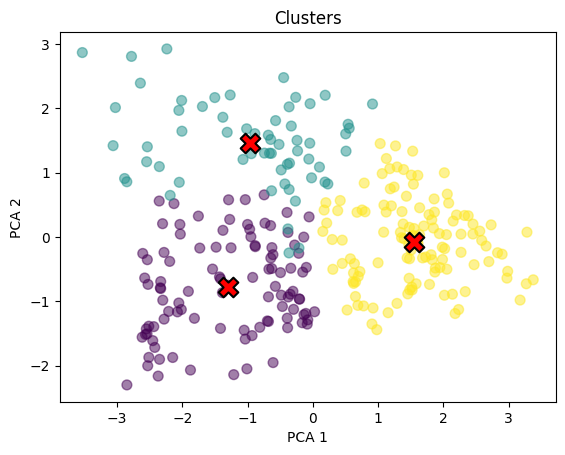


6. Visualizando coordenadas paralelas


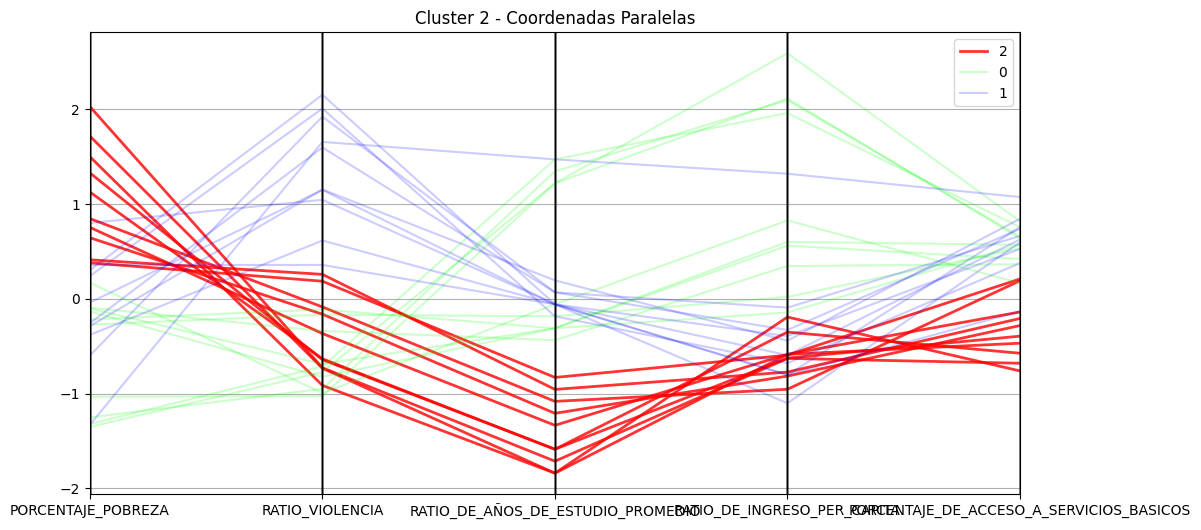

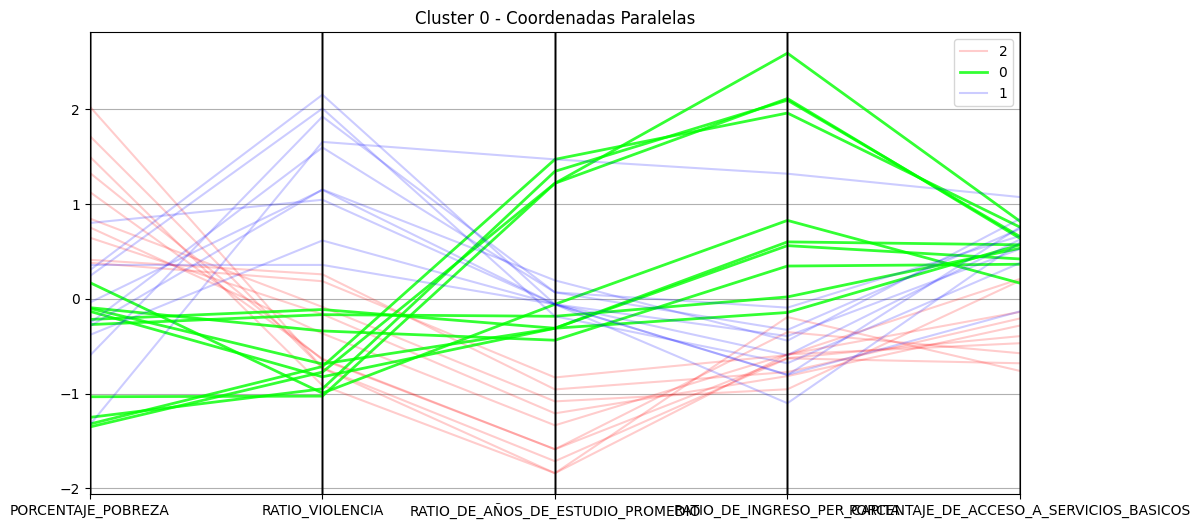

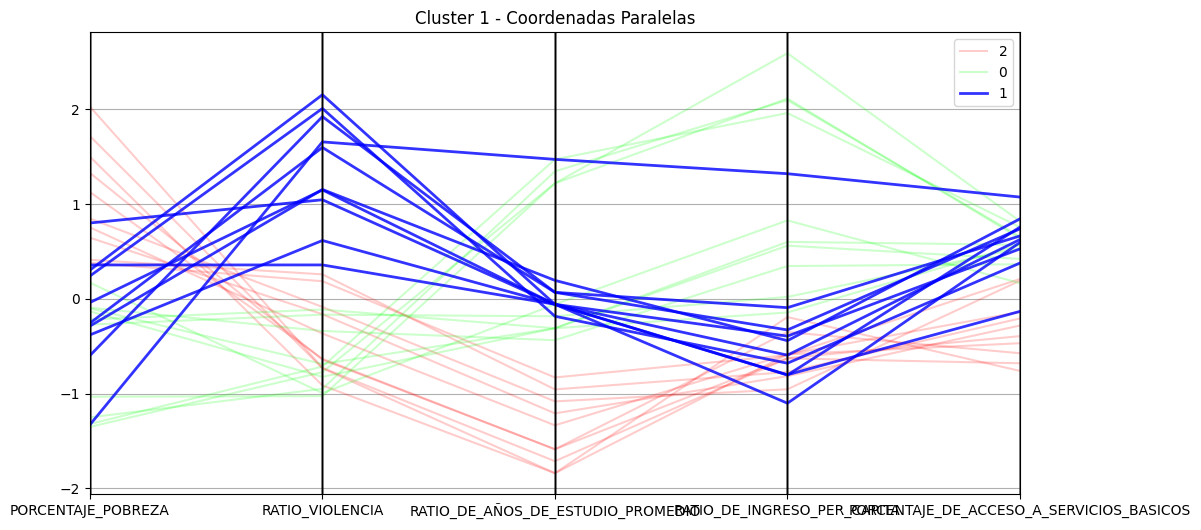


7. Visualizando coordenadas paralelas con todos los datos de cada cluster


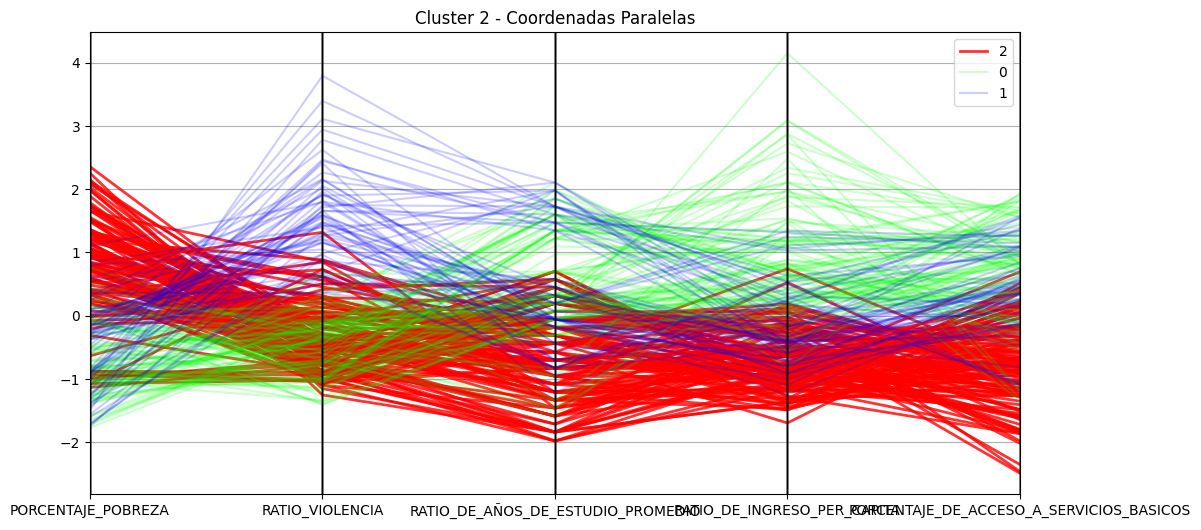

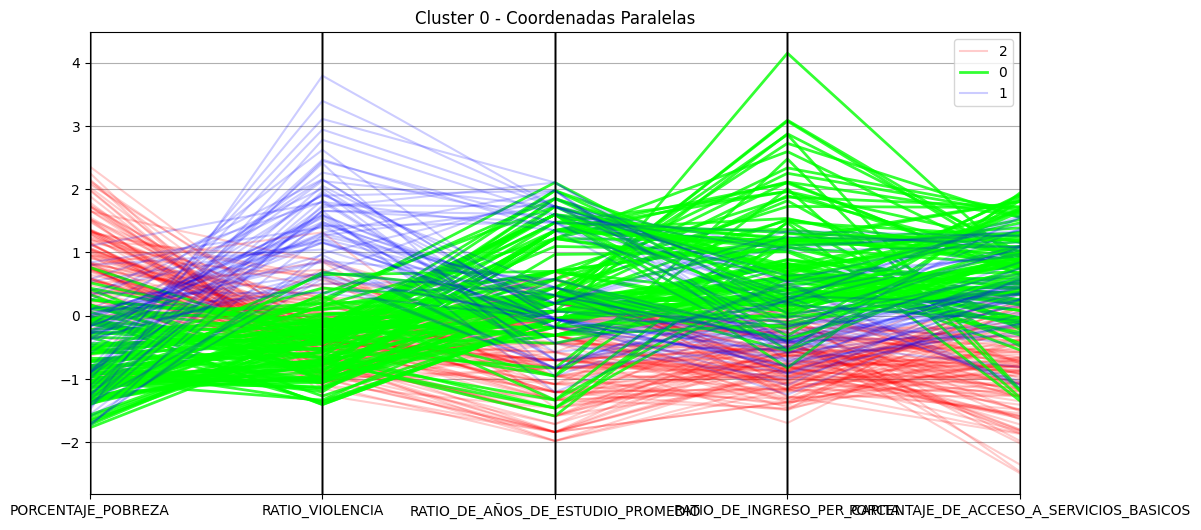

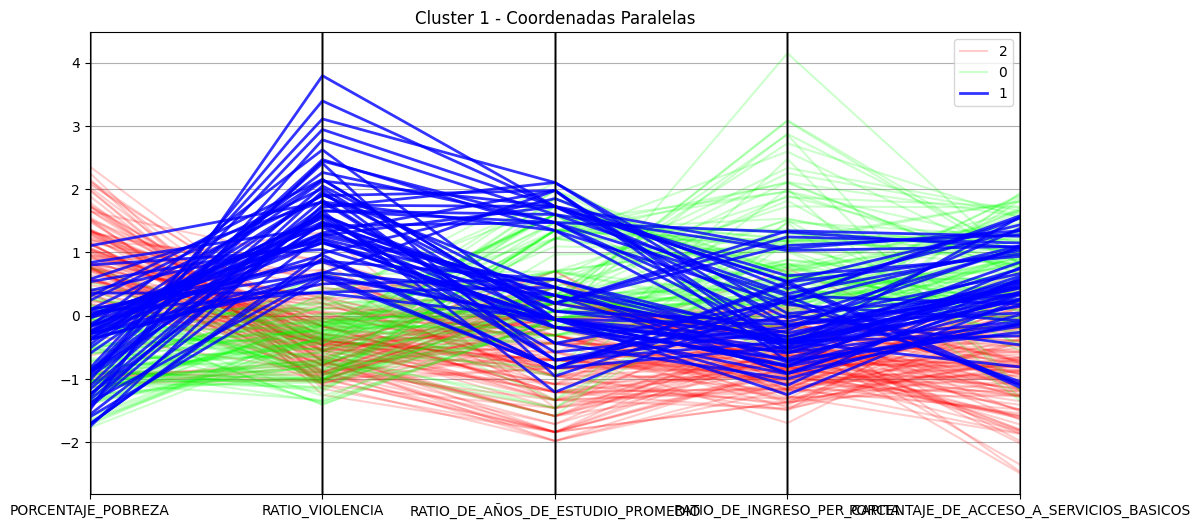


8. Visualizando coordenadas paralelas de los centroides


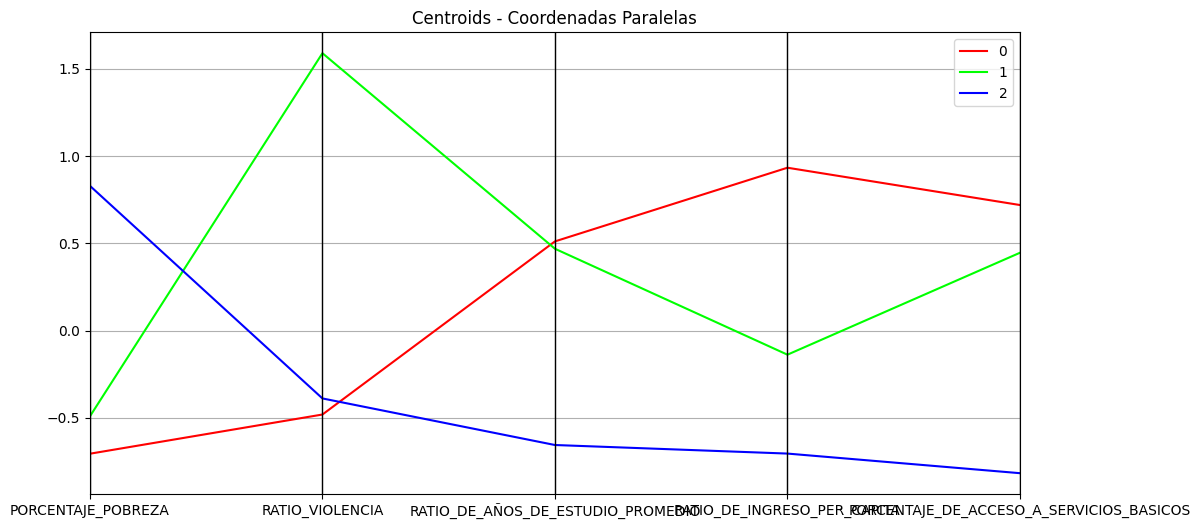

In [1]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from pandas.plotting import parallel_coordinates


def load_data(file_path):
    # Cargar el dataset
    df = pd.read_csv(file_path)
    row, col = df.shape
    print(f'Tenemos {row} filas y {col} columnas')

    # Lista de columnas para el clustering
    variables_clustering = [
        'PORCENTAJE_POBREZA', 'RATIO_VIOLENCIA', 
        'RATIO_DE_AÑOS_DE_ESTUDIO_PROMEDIO', 
        'RATIO_DE_INGRESO_PER_CAPITA', 
        'PORCENTAJE_DE_ACCESO_A_SERVICIOS_BASICOS'
    ]

    #manejo de valores faltantes
    imputer = SimpleImputer(strategy='mean')
    df[variables_clustering] = imputer.fit_transform(df[variables_clustering])

    #escalado de datos
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[variables_clustering]), columns=variables_clustering)

    return df_scaled, df

def pca_embeddings(df_scaled):
    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(df_scaled)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)

    print("\n*************** Most important features *************************")
    print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.4].iloc[0]).dropna())
    print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.4].iloc[1]).dropna())
    print("\n******************************************************************")

    return pca_2_result, pca_2

def kmean_hyper_param_tuning(data):
    parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()
    silhouette_scores = []

    for p in parameter_grid:
        kmeans_model.set_params(**p)
        kmeans_model.fit(data)
        ss = metrics.silhouette_score(data, kmeans_model.labels_)
        silhouette_scores.append(ss)

        print('Parameter:', p, 'Score', ss)

        if ss > best_score:
            best_score = ss
            best_grid = p

    plt.bar(range(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), parameters)
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']


def visualizing_results(pca_result, labels, centroids_pca):
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=labels, alpha=0.5, s=50)
    plt.title('Clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5, color='red', edgecolors="black")
    plt.show()


def display_parallel_coordinates(df, num_samples):
    clusters = df['CLUSTER'].unique()
    colors = ['#FF0000', '#00FF00', '#0000FF']

    for cluster in clusters:
        plt.figure(figsize=(12, 6))
        for i, clr in enumerate(clusters):
            subset = df[df['CLUSTER'] == clr].head(num_samples)
            color = colors[i]
            if clr == cluster:
                parallel_coordinates(subset, 'CLUSTER', color=[color], alpha=0.8, linewidth=2)
            else:
                parallel_coordinates(subset, 'CLUSTER', color=[color], alpha=0.2)
        plt.title(f'Cluster {cluster} - Coordenadas Paralelas')
        plt.show()

def display_parallel_coordinates_centroids(df):
    plt.figure(figsize=(12, 6))
    parallel_coordinates(df, 'cluster', color=['#FF0000', '#00FF00', '#0000FF'])
    plt.title('Centroids - Coordenadas Paralelas')
    plt.show()

def display_parallel_coordinates2(df):
    clusters = df['CLUSTER'].unique()
    colors = ['#FF0000', '#00FF00', '#0000FF']  # Red, Green, Blue for different clusters

    for i, cluster in enumerate(clusters):
        plt.figure(figsize=(12, 6))
        for j, clr in enumerate(clusters):
            subset = df[df['CLUSTER'] == clr]
            color = colors[j]
            if clr == cluster:
                parallel_coordinates(subset, 'CLUSTER', color=[color], alpha=0.8, linewidth=2)
            else:
                parallel_coordinates(subset, 'CLUSTER', color=[color], alpha=0.2)
        plt.title(f'Cluster {cluster} - Coordenadas Paralelas')
        plt.show()

if __name__ == "__main__":
    print("1. Cargando dataset\n")
    data_scaled, df_original = load_data('./SI_DATA_POBREZA.csv')
    
    print("\nDatos originales (primeras 10 filas):\n")
    display(df_original.head(10))

    print("\n2. Dataset escalado (primeras 10 filas):\n")
    display(data_scaled.head(10))

    print("\n\n3. Reducción de dimensionalidad con PCA\n")
    pca_result, pca_2 = pca_embeddings(data_scaled)

    print("\n\n 4. Selección de hiperparámetros para KMeans\n")
    optimum_num_clusters = kmean_hyper_param_tuning(pca_result)
    print("Número óptimo de clusters =", optimum_num_clusters)

    kmeans = KMeans(n_clusters=optimum_num_clusters, init='random')
    kmeans.fit(data_scaled)
    centroids = kmeans.cluster_centers_
    centroids_pca = pca_2.transform(centroids)

    df_original['CLUSTER'] = kmeans.labels_
    cluster_labels = kmeans.labels_
    unique, counts = np.unique(cluster_labels, return_counts=True)
    cluster_counts = dict(zip(unique, counts))
    print("\nNúmero de datos en cada cluster:")
    for cluster, count in cluster_counts.items():
        print(f"Cluster {cluster}: {count} datos")

    print("\nMuestras de datos en cada cluster:")
    for cluster in unique:
        sample_data = df_original[df_original['CLUSTER'] == cluster].head(10)
        print(f"\nCluster {cluster}:")
        display(sample_data)  # Usar display para mostrar el DataFrame en formato tabla

    print("\n\n5. Visualizando los clusters")
    
    visualizing_results(pca_result, kmeans.labels_, centroids_pca)

    data_scaled["CLUSTER"] = kmeans.labels_

    print("\n6. Visualizando coordenadas paralelas")
    display_parallel_coordinates(data_scaled, 10)

    centroids_df = pd.DataFrame(centroids, columns=data_scaled.columns[:-1])
    centroids_df['cluster'] = centroids_df.index

    print("\n7. Visualizando coordenadas paralelas con todos los datos de cada cluster")
    display_parallel_coordinates2(data_scaled)

    print("\n8. Visualizando coordenadas paralelas de los centroides")
    display_parallel_coordinates_centroids(centroids_df)

